In [461]:
#import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [463]:
data= pd.read_csv('C:\\Users\\DELL\\Downloads\\Absenteeism_data.csv')

In [465]:
#display first few rows
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [467]:
# dataset general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [482]:
#investigating our target variable

data['Absenteeism Time in Hours'].value_counts()

Absenteeism Time in Hours
8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
5        7
40       7
32       6
64       3
56       2
80       2
120      2
112      2
7        1
104      1
48       1
Name: count, dtype: int64

In [485]:
# summary statistics
data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [469]:
#unique number of reason of absence
pd.unique(data['Reason for Absence'])

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [471]:
len(data['Reason for Absence'].unique())

28

In [475]:
# check null values

data.isna().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

### Handeling Categorical variables

In [33]:
dummies = pd.get_dummies(data['Reason for Absence'], dtype = 'int', drop_first = True)

In [35]:
dummies

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
# create a column to check if sum of each row =1 
dummies['Check'] = dummies.sum(axis = 1)
dummies

,1,2,3,4,5,6,7,8,9,10,...,19,21,22,23,24,25,26,27,28,Check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
dummies= dummies.drop('Check', axis= 1)

In [492]:
#group dummy variables into groups to organize the data
reason_type_1 = dummies.loc[:, 1:14].max(axis = 1) # means horizontally
reason_type_2 = dummies.loc[:, 15:17].max(axis = 1)
reason_type_3 = dummies.loc[:, 18:21].max(axis = 1)
reason_type_4 = dummies.loc[:, 22:].max(axis = 1)


In [497]:
data= pd.concat([data, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1) #add horizontally

In [499]:
data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [501]:
data.columns= ['ID','Reason for Absence','Date','Transportation Expense',
               'Distance to Work','Age','Daily Work Load Average', 'Body Mass Index', 
               'Education', 'Children','Pets', 'Absenteeism Time in Hours','Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [503]:
data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [53]:
column_names = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','ID','Reason for Absence','Date','Transportation Expense',
               'Distance to Work','Age','Daily Work Load Average', 'Body Mass Index', 
               'Education', 'Children','Pets', 'Absenteeism Time in Hours']


In [55]:
data=data[column_names]

In [505]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


### Data Transformation

In [508]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y')

In [510]:
data['Month'] = data['Date'].dt.month

In [512]:
data['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [514]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [516]:
data['Day of the Week'] = data['Date'].apply(date_to_weekday) # monday is 0

In [518]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,0,0,0,1,7,1
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,0,0,0,0,7,1
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,0,0,0,1,7,2
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,1,0,0,0,7,3
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,0,0,0,1,7,3


In [76]:
data['Education'].unique() # 1 high school ,2 graduate, 3 postgraduate, 4 master or PHD

array([1, 3, 2, 4], dtype=int64)

In [520]:
data['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [522]:
data['Education'] = data['Education'].map({1: 0, 2:1, 3:1, 4:1}) #0 for high school,1 for graduates

In [524]:
data['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [86]:
data= data.drop(['ID', 'Reason for Absence', 'Date'], axis=1)

In [526]:
data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week
0,11,26,2015-07-07,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,1
1,36,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,0,0,0,0,7,1
2,3,23,2015-07-15,179,51,38,239.554,31,0,0,0,2,0,0,0,1,7,2
3,7,7,2015-07-16,279,5,39,239.554,24,0,2,0,4,1,0,0,0,7,3
4,11,23,2015-07-23,289,36,33,239.554,30,0,2,1,2,0,0,0,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,1,2,0,8,1,0,0,0,5,2
696,28,6,2018-05-23,225,26,28,237.656,24,0,1,2,3,1,0,0,0,5,2
697,18,10,2018-05-24,330,16,28,237.656,25,1,0,0,8,1,0,0,0,5,3
698,25,23,2018-05-24,235,16,32,237.656,25,1,0,0,2,0,0,0,1,5,3


In [90]:
data.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Month', 'Day of the Week'],
      dtype='object')

In [530]:
columns_order= ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [532]:
data=data[columns_order]

In [534]:
data

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2


In [536]:
data['Absenteeism Time in Hours'].median()

3.0

In [538]:
#if condition to divide the target variable bet excessive absent. or normal absent.

targets = np.where(data['Absenteeism Time in Hours']> 3, 1, 0) 

In [540]:
data['Excessive Absenteeism'] = targets

In [542]:
data['Excessive Absenteeism'].value_counts(normalize=True)

Excessive Absenteeism
0    0.544286
1    0.455714
Name: proportion, dtype: float64

In [106]:
df = data.drop(['Absenteeism Time in Hours'], axis = 1)

In [544]:
df

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,1
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,0
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,1
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,0


### Handeling Outliers 

In [551]:
columns = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children','Pets']

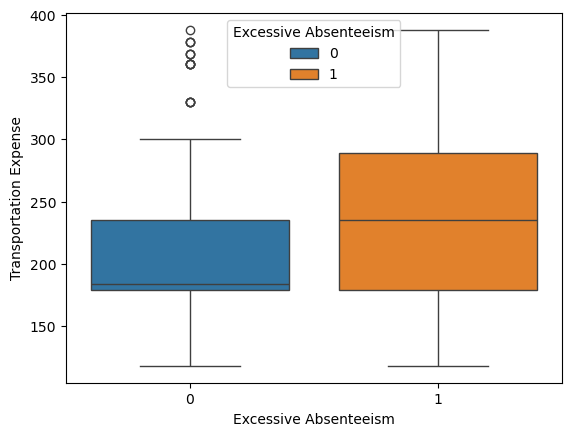

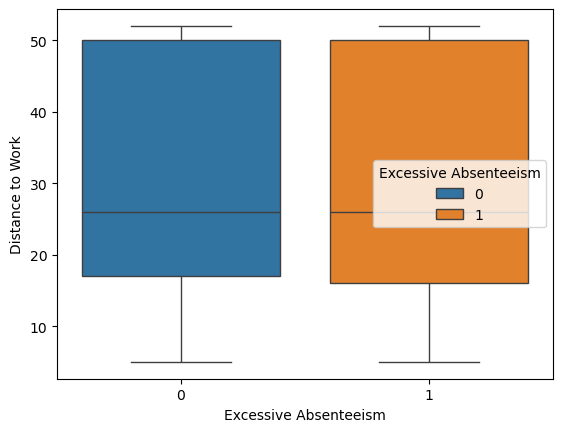

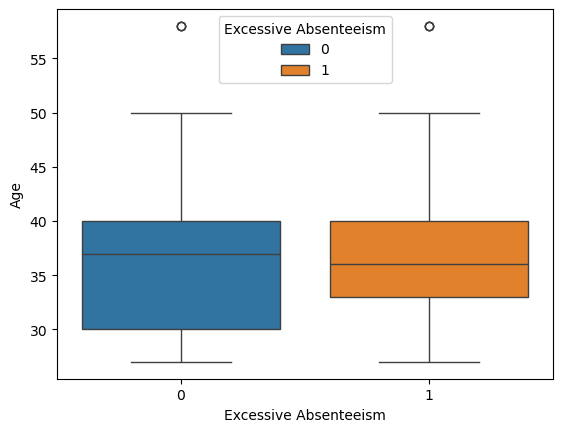

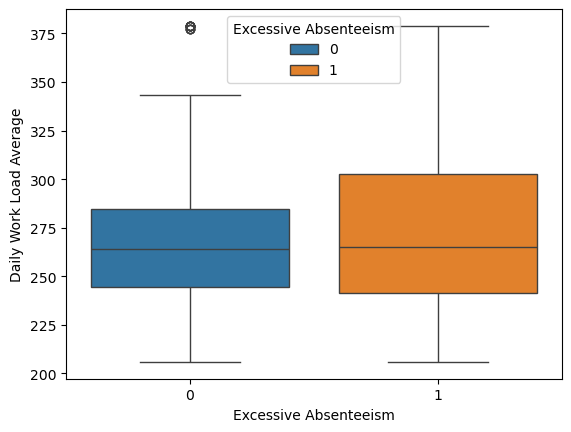

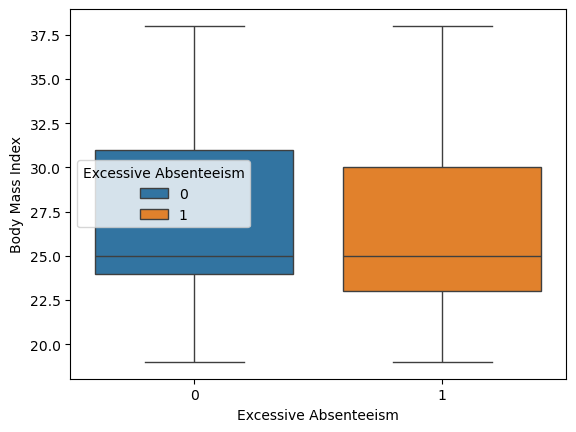

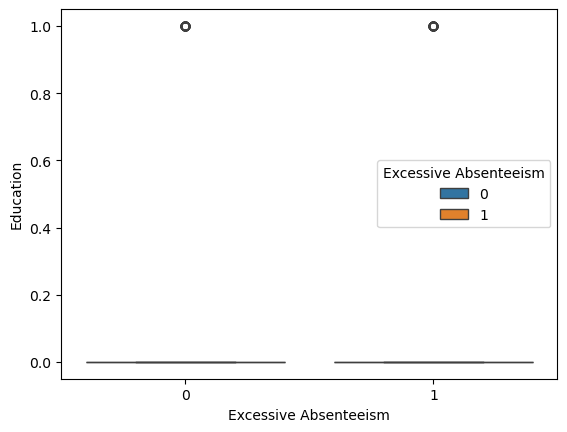

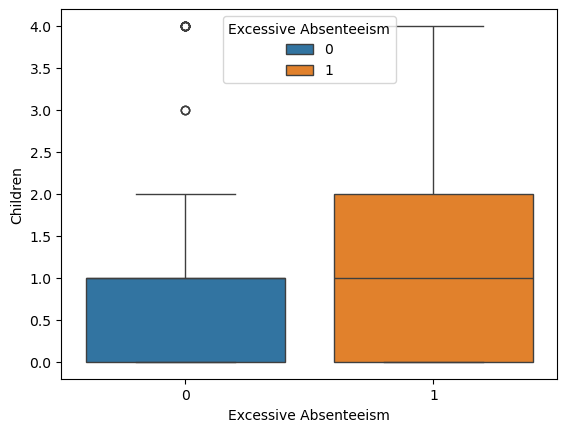

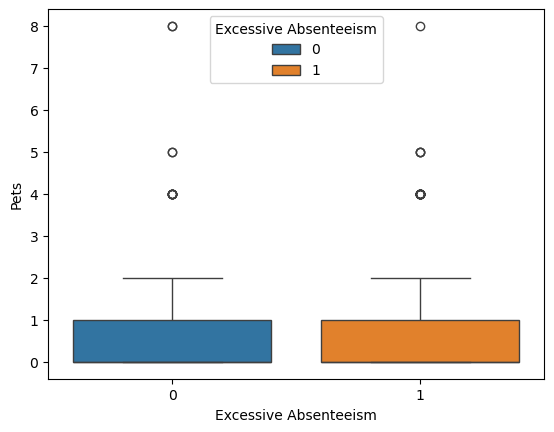

In [553]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Excessive Absenteeism', y= i, hue='Excessive Absenteeism')

In [555]:
"""Removes outliers from all numerical columns using the IQR method.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    threshold (float): Multiplier for the IQR (default is 1.5)

    Returns:
    pd.DataFrame: DataFrame with outliers removed
   """
    
def remove_outliers(df, threshold=1.5):
    df_clean = df.copy()  # Make a copy to avoid modifying the original dataframe
    num_cols = df_clean.select_dtypes(include=['number']).columns  # Select numerical columns

    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)  # First quartile
        Q3 = df_clean[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter out outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean


In [557]:
df_cleaned = remove_outliers(df)


In [559]:
numeric_columns= ['Month', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children',
       'Pets','Excessive Absenteeism']

<Axes: >

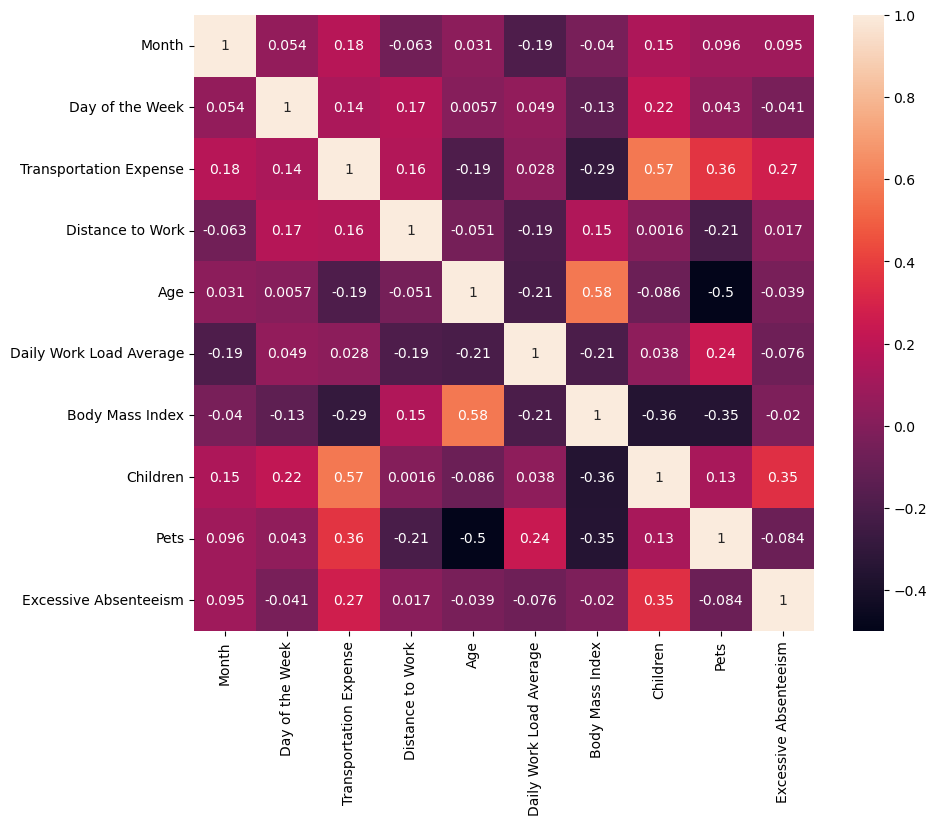

In [561]:
#find correlation between the target variable and other variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True)

In [391]:
numeric_cols= ['Month', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children',
       'Pets']

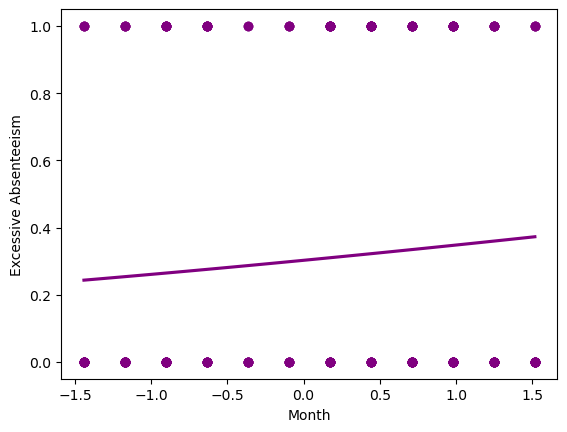

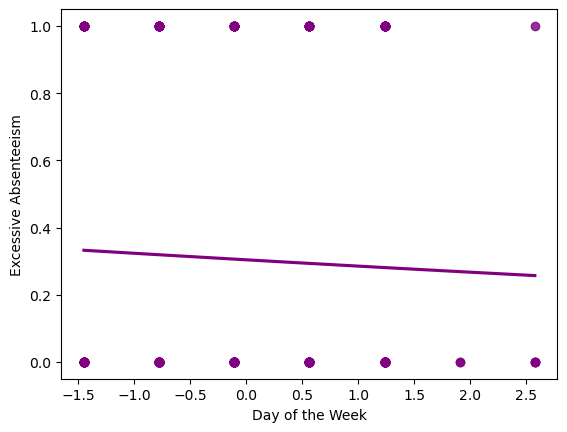

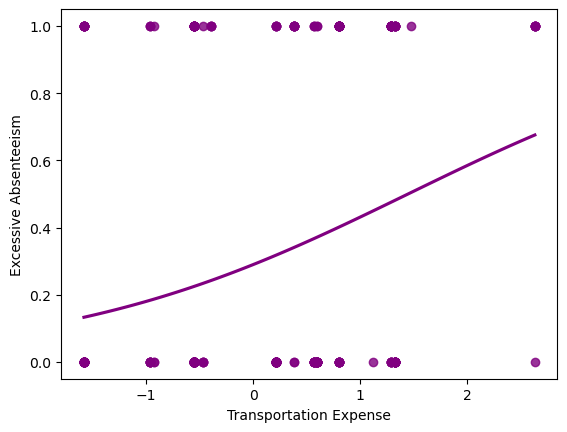

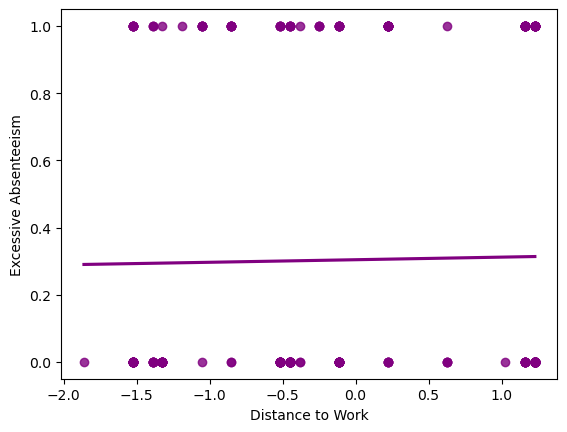

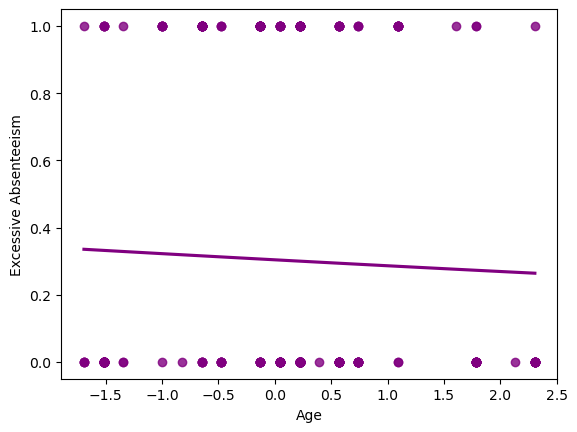

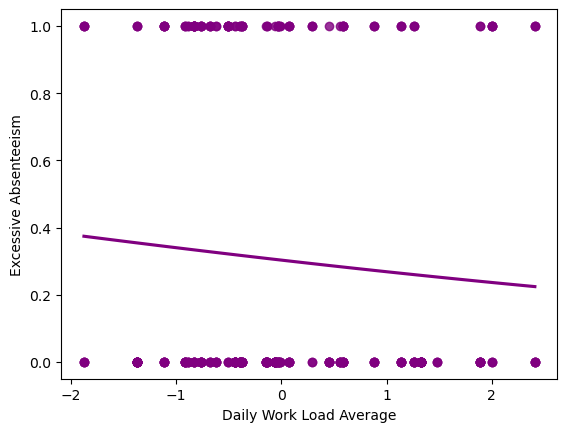

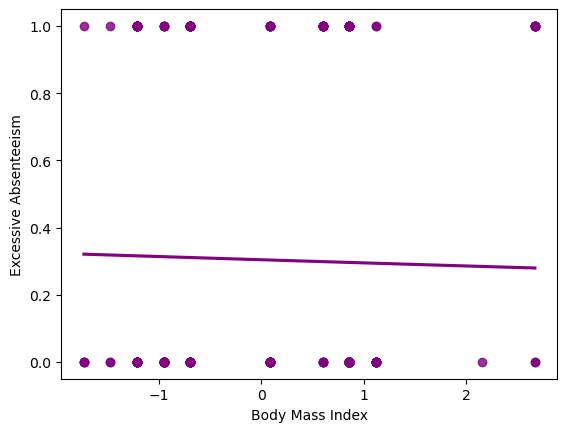

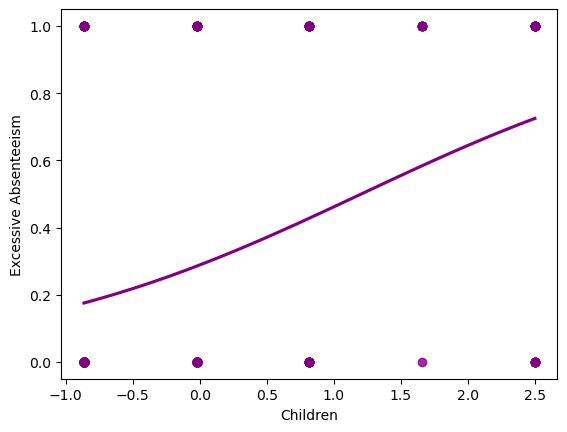

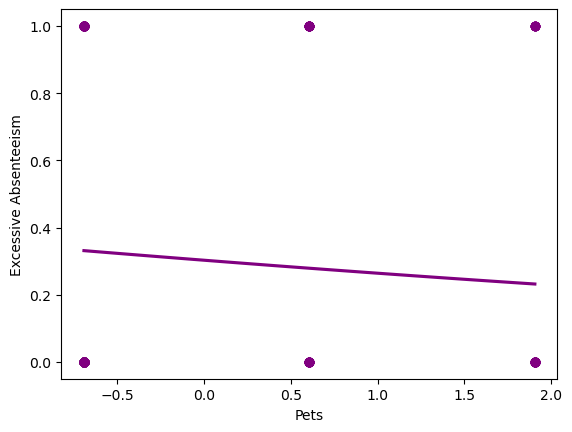

In [399]:
# check which variables have infuence to the target variable
for i in numeric_cols:
    plt.figure()
    sns.regplot(data=df_cleaned,x=df_cleaned[i], y='Excessive Absenteeism', ci=None, logistic= True, color='purple')

In [236]:
df_cleaned.groupby('Excessive Absenteeism')[['Month', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets']].mean()

,Month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
Excessive Absenteeism,,,,,,,,,,
0,6.125541,2.203463,201.541126,32.549784,36.883117,267.660242,27.735931,0.0,0.753247,0.575758
1,6.891089,2.069307,236.554455,33.089109,36.396040,262.354950,27.564356,0.0,1.653465,0.435644


## Building the Logistic Regression Model

In [563]:
X= df_cleaned[numeric_cols]
y= df_cleaned[['Excessive Absenteeism']]

In [565]:
scaler= StandardScaler()

In [567]:
x_scaled=scaler.fit_transform(X)

In [569]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y,test_size= 0.2, random_state=10)

In [571]:
model= LogisticRegression()

In [573]:
model.fit(X_train, y_train)

LogisticRegression()

In [575]:
y_pred= model.predict(X_test)

In [577]:
accuracy= accuracy_score(y_test, y_pred)

In [579]:
#calculating the accuracy , recall, precision , and f1 scores
print("Accuracy:", "%.4f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.3f" % precision_score(y_test, y_pred))
print("Recall:", "%.3f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, y_pred))

Accuracy: 0.8209
Precision: 0.778
Recall: 0.412
F1 Score: 0.538


### **Key Observations**
- **Accuracy**: Measures overall correctness of the model.
- **Precision**: Out of all the patients predicted as diabetic, how many actually have diabetes.
- **Recall**: Out of all actual diabetic patients, how many were correctly identified.
- **F1_Score**: balances Precision and Recall using their harmonic mean. It is especially useful when dealing with imbalanced datasets.

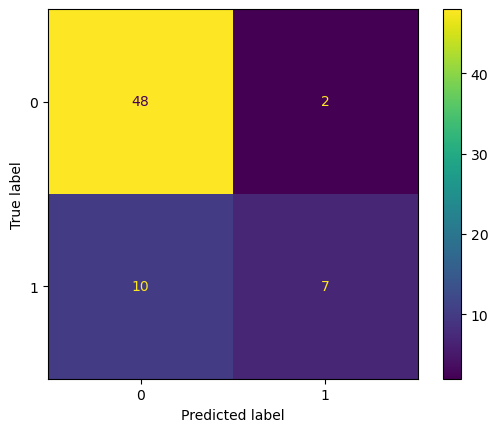

In [581]:
 ### Build confusion Matrix ###

cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
disp.plot()

- **True Negatives (TN = 48)** → The model correctly predicted 48 employees as not excessively absent.
- **False Positives (FP = 2)** → The model incorrectly predicted 2 employees as excessively absent, but they were not.
- **False Negatives (FN = 10)** → The model failed to identify 10 employees who were actually excessively absent.
- **True Positives (TP = 7)** → The model correctly predicted 7 employees as excessively absent.

In [583]:
model.coef_

array([[ 0.25221183, -0.19612685,  0.46302115, -0.26792611, -0.54712899,
        -0.16503882,  0.34551975,  0.62367813, -0.64660312]])

In [585]:
model.intercept_

array([-0.88676454])

In [587]:
feature_name= X.columns.values

In [589]:
summary_table = pd.DataFrame(columns= ['Feature_name'], data= feature_name)
summary_table['Coefficient'] = np.transpose(model.coef_)

In [591]:
summary_table

,Feature_name,Coefficient
0,Month,0.252212
1,Day of the Week,-0.196127
2,Transportation Expense,0.463021
3,Distance to Work,-0.267926
4,Age,-0.547129
5,Daily Work Load Average,-0.165039
6,Body Mass Index,0.345520
7,Children,0.623678
8,Pets,-0.646603


from the summary table we can conclude that the most significant factors influencing excessive absence are:
- **Children** with coef of 0.623
- **Transportation Expense** at 0.463 
- **Body Mass Index** at 0.345